In [ ]:
# Data Preparation

In [1]:
# import common libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt

In [2]:
dfGP = pd.read_csv("BankChurn.csv")

In [3]:
dfGP.head()
dfGP.info()
dfGP.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           9994 non-null   object 
 3   gender            9993 non-null   object 
 4   age               9999 non-null   float64
 5   tenure            9998 non-null   float64
 6   balance           6383 non-null   float64
 7   products_number   9995 non-null   float64
 8   credit_card       9998 non-null   float64
 9   active_member     9999 non-null   float64
 10  estimated_salary  9998 non-null   float64
 11  churn             10000 non-null  int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 937.6+ KB


customer_id            0
credit_score           0
country                6
gender                 7
age                    1
tenure                 2
balance             3617
products_number        5
credit_card            2
active_member          1
estimated_salary       2
churn                  0
dtype: int64

In [4]:
# Drop customer_id column
dfGP=dfGP.drop(["customer_id"], axis=1)

In [5]:
dfGP=dfGP.dropna()
dfGP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6377 entries, 1 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      6377 non-null   int64  
 1   country           6377 non-null   object 
 2   gender            6377 non-null   object 
 3   age               6377 non-null   float64
 4   tenure            6377 non-null   float64
 5   balance           6377 non-null   float64
 6   products_number   6377 non-null   float64
 7   credit_card       6377 non-null   float64
 8   active_member     6377 non-null   float64
 9   estimated_salary  6377 non-null   float64
 10  churn             6377 non-null   int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 597.8+ KB


In [6]:
dfGP = pd.get_dummies(dfGP, drop_first=True, dtype = int)

In [8]:
y= np.array(dfGP["churn"])
X = dfGP[["credit_score", "age", "tenure", "balance", "products_number", "credit_card", "active_member", "estimated_salary", "country_Germany", "country_Spain", "gender_Male"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
from sklearn.tree import DecisionTreeClassifier
clf_gini_gp = DecisionTreeClassifier(criterion='gini', random_state=42)

# Train Model
clf_gini_gp.fit(X_train, y_train)
y_pred_dt = clf_gini_gp.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred_dt)

conf_matrix = metrics.confusion_matrix(y_test, y_pred_dt)

print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)


Accuracy: 0.7507836990595611

Confusion Matrix:
 [[1181  269]
 [ 208  256]]


In [12]:
# First Random Forest Clasifier with n_estimators=100

from sklearn.ensemble import RandomForestClassifier
clf_gp = RandomForestClassifier(n_estimators=100, random_state=42)

clf_gp.fit(X_train, y_train)

y_pred_rf = clf_gp.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred_rf)

conf_matrix = metrics.confusion_matrix(y_test, y_pred_rf)

print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)



Accuracy: 0.8322884012539185

Confusion Matrix:
 [[1385   65]
 [ 256  208]]


In [13]:
# Second Random forest classifier with n_estimators set to 
clf500_gp = RandomForestClassifier(n_estimators=500, random_state=42)
clf500_gp.fit(X_train, y_train)


y_pred_rf = clf500_gp.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred_rf)

conf_matrix = metrics.confusion_matrix(y_test, y_pred_rf)

print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)



Accuracy: 0.8390804597701149

Confusion Matrix:
 [[1382   68]
 [ 240  224]]


Start search time: 2024-03-04 12:52:10.287407
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 300}
Best estimator: RandomForestClassifier(max_depth=8, max_features='sqrt', n_estimators=300,
                       random_state=42)
Feature importance: [0.06072637 0.35650353 0.0291952  0.08827388 0.23448558 0.00598403
 0.08489385 0.06328757 0.0477641  0.00610328 0.02278261]
End search time: 2024-03-04 12:54:30.745404

Accuracy: 0.8380355276907001


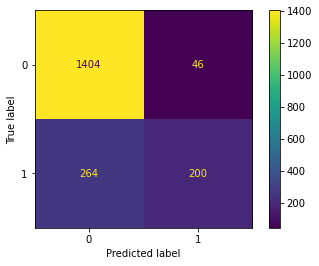

In [31]:
# Fine tune Random Forest Classifier
from datetime import datetime
print("Start search time:", datetime.now())

from sklearn.ensemble import RandomForestClassifier

# find the best parameters 
from sklearn.model_selection import GridSearchCV

# RF -- Tunning parameters 
# Define the parameter grid
param = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_features': ['sqrt', 'log2'],  # Number of features to consider at every split
    'max_depth': [4, 6, 8],  # Maximum number of levels in tree
    'criterion': ['gini', 'entropy']  # Function to measure the quality of a split
}

RF = RandomForestClassifier(random_state=42)

# search parameters: cv=cross validation blocks; verbose=higher value show more steps
# n_jobs=-1 uses all available CPU cores; 
grid = GridSearchCV(estimator=RF, 
                    param_grid=param,
                    scoring="accuracy",
                    verbose=1, cv=5)

grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)

print("Best estimator:", grid.best_estimator_)

print("Feature importance:", grid.best_estimator_.feature_importances_)

# end grid search
print("End search time:", datetime.now())

# confusion matrix 

final_model_rf = grid.best_estimator_

y_pred = final_model_rf.predict(X_test)

# get accuracy and confusion matrix
accuracy = metrics.accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

cm = metrics.confusion_matrix(y_test,y_pred) # row - true value; column - predicted
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm).plot()


In [33]:
# SVM with linear kernel

from sklearn.svm import SVC


svm_classifier = SVC(kernel='linear', random_state=42)


svm_classifier.fit(X_train, y_train)

y_pred_svm = svm_classifier.predict(X_test)


accuracy = metrics.accuracy_score(y_test, y_pred_svm)


conf_matrix = metrics.confusion_matrix(y_test, y_pred_svm)

print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)



Accuracy: 0.7466039707419018

Confusion Matrix:
 [[1402   48]
 [ 437   27]]


In [35]:
# SVM with radial kernel

from sklearn.svm import SVC


svm_classifier = SVC(kernel='rbf', random_state=42)


svm_classifier.fit(X_train, y_train)

y_pred_svm = svm_classifier.predict(X_test)


accuracy = metrics.accuracy_score(y_test, y_pred_svm)


conf_matrix = metrics.confusion_matrix(y_test, y_pred_svm)

print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)



Accuracy: 0.7575757575757576

Confusion Matrix:
 [[1450    0]
 [ 464    0]]


In [9]:
# SVM - Fine tuning with GridSearchCV
# using datetime to time the fine tuning process
from sklearn.svm import SVC
from datetime import datetime
print("Start search time:", datetime.now())

# find the best parameters
from sklearn.model_selection import GridSearchCV

# SVM -- Tunning parameters
param = {
    'C':[.00001, .0001, .001, 0.01],
    'gamma': [.00001, .0001, .001, .01], # 1/n_features
    'kernel': ['rbf','linear']
}

SVM = SVC(random_state=42)


# search parameters: cv=cross validation blocks; verbose=higher value show more steps
# n_jobs=-1 uses all available CPU cores;
grid = GridSearchCV(estimator= SVM,
                    param_grid=param,
                    verbose=3, cv=3,
                    refit=True)

grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)

print("Best estimator:", grid.best_estimator_)

# end grid search
print("End search time:", datetime.now())

Start search time: 2024-03-05 10:58:52.810412
Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV 1/3] END ..C=1e-05, gamma=1e-05, kernel=rbf;, score=0.759 total time=   0.3s
[CV 2/3] END ..C=1e-05, gamma=1e-05, kernel=rbf;, score=0.759 total time=   0.3s
[CV 3/3] END ..C=1e-05, gamma=1e-05, kernel=rbf;, score=0.760 total time=   0.3s
[CV 1/3] END C=1e-05, gamma=1e-05, kernel=linear;, score=0.759 total time= 1.9min
[CV 2/3] END C=1e-05, gamma=1e-05, kernel=linear;, score=0.759 total time= 2.1min
[CV 3/3] END C=1e-05, gamma=1e-05, kernel=linear;, score=0.760 total time= 2.0min
[CV 1/3] END .C=1e-05, gamma=0.0001, kernel=rbf;, score=0.759 total time=   0.3s
[CV 2/3] END .C=1e-05, gamma=0.0001, kernel=rbf;, score=0.759 total time=   0.3s
[CV 3/3] END .C=1e-05, gamma=0.0001, kernel=rbf;, score=0.760 total time=   0.3s
[CV 1/3] END C=1e-05, gamma=0.0001, kernel=linear;, score=0.759 total time= 1.9min
[CV 2/3] END C=1e-05, gamma=0.0001, kernel=linear;, score=0.759 total time= 2.

In [13]:
from matplotlib import pyplot as plt


Accuracy: 0.7575757575757576


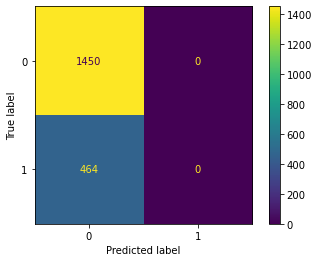

In [14]:
# confusion matrix

final_model_svm = grid.best_estimator_

y_pred = final_model_svm.predict(X_test)

# get accuracy and confusion matrix
accuracy = metrics.accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

cm = metrics.confusion_matrix(y_test,y_pred) # row - true value; column - predicted
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm).plot()
# disp.plot()
plt.show() # display all open figures

In [9]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param = {

                'C': uniform(0.1, 10), # regularization parameter from a uniform                                                              distribution

                'kernel': ['linear', 'rbf'],

                'gamma': reciprocal(0.001, 0.1)

}

random_search = RandomSearchCV(estimator=SVM, param_grid=param, cv=3, verbose=1, scoring="accuracy")

NameError: name 'uniform' is not defined